# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk

C:\Users\ARCHI\anaconda3\envs\project-env\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import tensorflow as tf
import seaborn as sns
from sklearn.utils import shuffle
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = PorterStemmer()

import warnings
warnings.filterwarnings("ignore")

# Reading and Analysing Data

In [3]:
tweets = pd.read_csv('twitter_training.csv')
tweets_val = pd.read_csv('twitter_validation.csv')

In [4]:
tweets = shuffle(tweets)
tweets.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
54197,2111,CallOfDuty,Irrelevant,They wanted to talk shit before game so ill ta...
53995,2077,CallOfDuty,Negative,"THAT IS, POZDRAVLYAETSя!!!!!....................."
12624,8570,NBA2K,Negative,Aye why @ NBA2K _ MyTEAM give @ mikal _ bridge...
74615,9190,Nvidia,Positive,This news about the Nvidia 3000 series is ligi...
17555,9811,PlayStation5(PS5),Irrelevant,So your tellin me that the 737 Aircraft won’t ...


In [5]:
print("Shape:" ,tweets.shape)
print("Target Classes: ",tweets['Positive'].unique())

Shape: (74681, 4)
Target Classes:  ['Irrelevant' 'Negative' 'Positive' 'Neutral']


In [6]:
tweets = tweets[tweets['Positive'] != "Irrelevant"]

In [7]:
for i in tweets['Positive'].unique():
    print(f'Length of {i}={len(tweets[tweets["Positive"] == str(i)])}')

Length of Negative=22542
Length of Positive=20831
Length of Neutral=18318


In [25]:
df = pd.DataFrame(tweets['Positive'])

<AxesSubplot:xlabel='Positive', ylabel='count'>

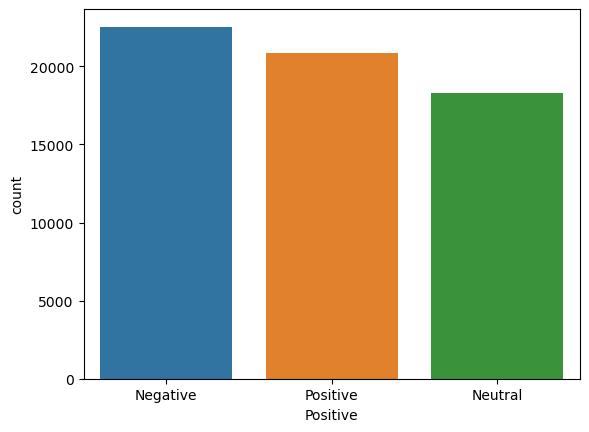

In [26]:
sns.countplot(x='Positive', data=df)

In [27]:
tweets = tweets[['Positive','im getting on borderlands and i will murder you all ,']]

In [28]:
tweets.rename(columns={'Positive':"Sentiment",'im getting on borderlands and i will murder you all ,':'text'},inplace=True)

In [29]:
tweets.head()

,Sentiment,text
53995,Negative,"THAT IS, POZDRAVLYAETSя!!!!!....................."
12624,Negative,Aye why @ NBA2K _ MyTEAM give @ mikal _ bridge...
74615,Positive,This news about the Nvidia 3000 series is ligi...
39854,Neutral,Fair play I’m pretty high on
27466,Neutral,Shop Price Creed 8 Flag offers in ebay. New in...


In [30]:
sentences = tweets['text'].values
labels = tweets['Sentiment'].values

In [31]:
stopwords = [set(stopwords.words('english'))]

# Data Cleaning

In [32]:
cleaned_sentences = []
final_labels = []
for i in range(len(sentences)):
    try:
        sent = re.sub('[^A-Za-z]',' ',sentences[i])
        sent = sent.lower()
        sent = nltk.word_tokenize(sent)
        ps = nltk.pos_tag(sent)
        sent = [i[0] for i in ps if i[1] == ('JJ' or 'VBP'or'VB')]
        sent = ' '.join(sent)
        if sent != '':
            cleaned_sentences.append(sentences[i])
            final_labels.append(labels[i])
        if i%10000==0:
            print('Count:',i)
    except:
        pass

Count: 0
Count: 10000
Count: 20000
Count: 30000
Count: 40000
Count: 50000
Count: 60000


In [33]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

cv = CountVectorizer()
X = cv.fit_transform(cleaned_sentences)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, final_labels, test_size = 0.20, random_state = 32)

from sklearn.naive_bayes import MultinomialNB

nb_clf = MultinomialNB()
nb_clf.fit(X_train,y_train)

y_pred  = nb_clf.predict(X_test)

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
print("Score",accuracy_score(y_pred,y_test))
print("F1-score",f1_score(y_pred,y_test,average='weighted'))

Score 0.8174820750738085
F1-score 0.8189800102463473


In [34]:
tf = TfidfVectorizer()
messages_tf = tf.fit_transform(cleaned_sentences)
X_train, X_test, y_train, y_test = train_test_split(messages_tf, final_labels, test_size = 0.20, random_state = 32)
nb_clf_tf = MultinomialNB()
nb_clf_tf.fit(X_train,y_train)
y_pred_tf  = nb_clf.predict(X_test)
print("Score",accuracy_score(y_pred_tf,y_test))
print("F1-score",f1_score(y_pred_tf,y_test,average='weighted'))

Score 0.8458456347532687
F1-score 0.8463367739277764


In [1]:
# cleaned_sentences,final_labels

In [40]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer

In [41]:
for j,i in enumerate(final_labels):
    if i=='Positive':
        final_labels[j]=0
    elif i=="Negative":
        final_labels[j]=1
    else:
        final_labels[j]=2

In [42]:
import tensorflow as tf
final_labels_ = tf.keras.utils.to_categorical(final_labels,num_classes=3)

In [43]:
final_labels_

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

# Dividing the dataset

In [44]:
X_train, X_test_val, y_train, y_test_val = train_test_split(cleaned_sentences, final_labels_, test_size=0.20, random_state=42)

In [45]:
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.50, random_state=41)

In [46]:
num_words = 5000
tokenizer = Tokenizer(num_words=num_words,oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

In [47]:
vocab_size = len(tokenizer.word_index) + 1

max_len = 120
emb_dim = 100

X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test, padding='post', maxlen=max_len)
X_val = pad_sequences(X_val, padding='post', maxlen=max_len)

# Model

In [48]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, emb_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 100)          2669700   
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
 dense_1 (Dense)             (None, 3)                 21        
                                                                 
Total params: 2,670,327
Trainable params: 2,670,327
Non-trainable params: 0
_________________________________________________________________


In [49]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs,batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
1186/1186 [==============================] - 30s 24ms/step - loss: 0.9256 - accuracy: 0.5800 - val_loss: 0.7447 - val_accuracy: 0.7052
Epoch 2/20
1186/1186 [==============================] - 28s 24ms/step - loss: 0.6553 - accuracy: 0.7361 - val_loss: 0.6118 - val_accuracy: 0.7596
Epoch 3/20
1186/1186 [==============================] - 28s 23ms/step - loss: 0.5399 - accuracy: 0.7897 - val_loss: 0.5719 - val_accuracy: 0.7712
Epoch 4/20
1186/1186 [==============================] - 28s 23ms/step - loss: 0.4718 - accuracy: 0.8165 - val_loss: 0.5277 - val_accuracy: 0.7830
Epoch 5/20
1186/1186 [==============================] - 28s 23ms/step - loss: 0.4279 - accuracy: 0.8344 - val_loss: 0.5020 - val_accuracy: 0.7988
Epoch 6/20
1186/1186 [==============================] - 28s 23ms/step - loss: 0.3972 - accuracy: 0.8458 - val_loss: 0.4863 - val_accuracy: 0.8075
Epoch 7/20
1186/1186 [==============================] - 28s 23ms/step - loss: 0.3745 - accuracy: 0.8532 - val_loss: 0.4858 -

In [51]:
model.save('sentiment_model.h5')

# Accuracy Curve and Loss Curve

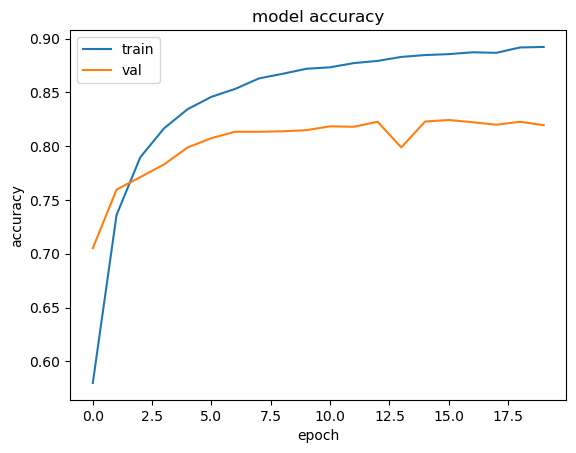

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

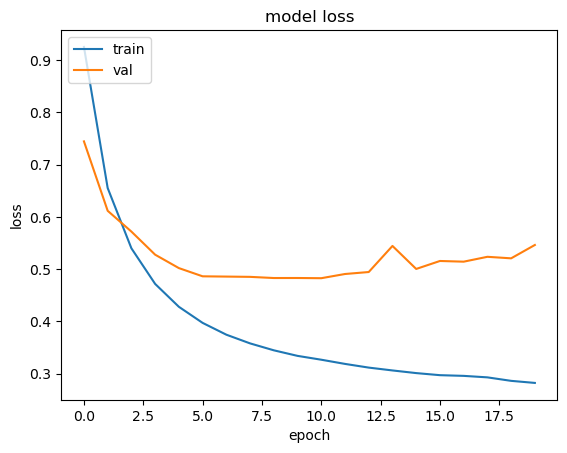

In [53]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [54]:
pred = model.predict(X_test)

149/149 [==============================] - 0s 2ms/step


In [55]:
X_test[0]

array([  60,   14, 1664, 1918,   23,   53,    1,   70,    3, 1138,    4,
        102,  316, 1423,   31,    3,   94, 1576,   34,   14,   93,    1,
         20,   16,   46, 2815,  408,   14, 1562,   58,  687,    7, 1898,
        140,   23,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [56]:
pred = np.argmax(pred,axis=1)
y_test = np.argmax(y_test,axis=1)

In [57]:
from sklearn.metrics import accuracy_score
# pred = np.argmax(pred, axis=1)
accuracy_score(pred, y_test)

0.7992408266554196